# Exercise 1: Predictive Data Modeling with Scikit-learn

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a decision tree classifier using the entropy (information gain) criterion
clf = DecisionTreeClassifier(criterion="entropy")

In [24]:
X = [[0, 0], [1, 1]]
y = [0, 1]
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [25]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X)
accuracy_score(y, pred)

1.0

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [27]:
from sklearn.metrics import accuracy_score

rf.fit(X, y)
pred = rf.predict(X)
accuracy_score(y, pred)

1.0

In [28]:
import pickle
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the MNIST dataset
with open("data/mnist.pkl", "rb") as f:
    train_set, valid_set, test_set = pickle.load(f, encoding="latin1")

train_x, train_y = train_set
test_x,  test_y  = test_set
train_x = pd.DataFrame(train_x)
test_x  = pd.DataFrame(test_x)
train_y = pd.Series(train_y)
test_y  = pd.Series(test_y)

Decision Tree Accuracy(max_depth: 10, min_samples_split: 2): 0.8722
Decision Tree Accuracy(max_depth: 10, min_samples_split: 10): 0.8706
Decision Tree Accuracy(max_depth: 10, min_samples_split: 20): 0.8696
Decision Tree Accuracy(max_depth: 20, min_samples_split: 2): 0.8815
Decision Tree Accuracy(max_depth: 20, min_samples_split: 10): 0.8808
Decision Tree Accuracy(max_depth: 20, min_samples_split: 20): 0.8763
Decision Tree Accuracy(max_depth: None, min_samples_split: 2): 0.8828
Decision Tree Accuracy(max_depth: None, min_samples_split: 10): 0.8808
Decision Tree Accuracy(max_depth: None, min_samples_split: 20): 0.8763

Best hyperparameters for Decision Tree : max_depth: None, min_samples_split: 2, Accuracy = 0.8828


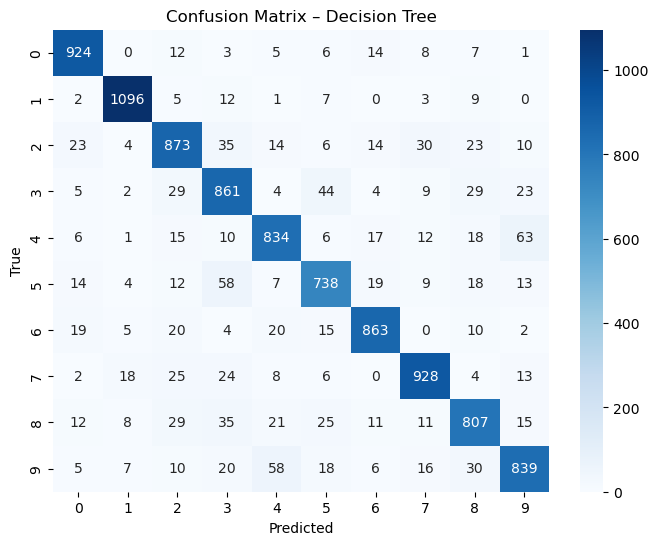

In [29]:
max_depth = [10, 20, None]
min_samples_split = [2, 10, 20]
dt_best_set = [0,0,0]
for i in max_depth:
    for j in min_samples_split:
        dt_clf = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth = i, min_samples_split = j)
        dt_clf.fit(train_x, train_y)

        dt_pred = dt_clf.predict(test_x)
        dt_acc  = accuracy_score(test_y, dt_pred)
        if dt_acc > dt_best_set[2]:
            dt_best_set = [i, j, dt_acc]
        print(f"Decision Tree Accuracy(max_depth: {i}, min_samples_split: {j}):", dt_acc)
print(f"\nBest hyperparameters for Decision Tree : max_depth: {dt_best_set[0]}, min_samples_split: {dt_best_set[1]}, Accuracy = {dt_best_set[2]:.4f}")

dt_cm = confusion_matrix(test_y, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Random Forest Accuracy(max_depth: 10, n_estimators: 10): 0.9298
Random Forest Accuracy(max_depth: 10, n_estimators: 50): 0.9455
Random Forest Accuracy(max_depth: 10, n_estimators: 100): 0.947
Random Forest Accuracy(max_depth: 10, n_estimators: 200): 0.948
Random Forest Accuracy(max_depth: 20, n_estimators: 10): 0.9453
Random Forest Accuracy(max_depth: 20, n_estimators: 50): 0.9628
Random Forest Accuracy(max_depth: 20, n_estimators: 100): 0.9677
Random Forest Accuracy(max_depth: 20, n_estimators: 200): 0.9691
Random Forest Accuracy(max_depth: None, n_estimators: 10): 0.9472
Random Forest Accuracy(max_depth: None, n_estimators: 50): 0.965
Random Forest Accuracy(max_depth: None, n_estimators: 100): 0.968
Random Forest Accuracy(max_depth: None, n_estimators: 200): 0.9693

Best hyperparameters for Random Forest: max_depth: None, n_estimators: 200, Accuracy = 0.9693


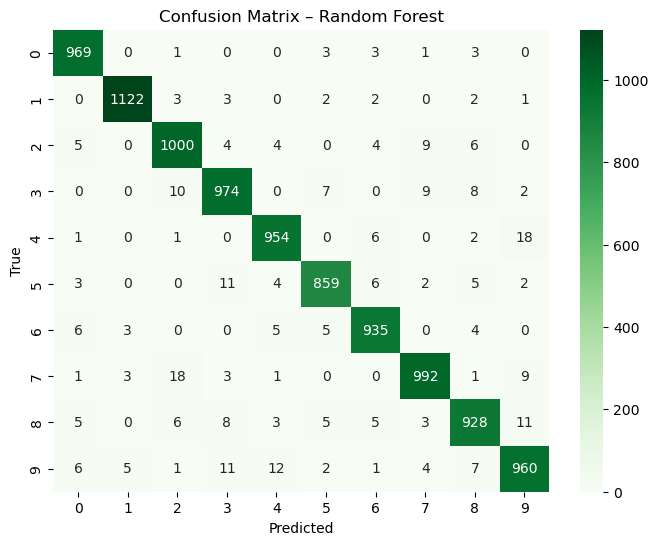

In [30]:
n_estimators = [10, 50, 100, 200]
rf_best_set = [0,0,0]
for i in max_depth:
    for j in n_estimators:
        rf_clf = RandomForestClassifier(n_estimators=j, random_state=42, max_depth = i)
        rf_clf.fit(train_x, train_y)

        rf_pred = rf_clf.predict(test_x)
        rf_acc  = accuracy_score(test_y, rf_pred)
        if rf_acc > rf_best_set[2]:
            rf_best_set = [i, j, rf_acc]
        print(f"Random Forest Accuracy(max_depth: {i}, n_estimators: {j}):", rf_acc)
print(f"\nBest hyperparameters for Random Forest: max_depth: {rf_best_set[0]}, n_estimators: {rf_best_set[1]}, Accuracy = {rf_best_set[2]:.4f}")
rf_cm = confusion_matrix(test_y, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Compare model performances

In [31]:
if rf_best_set[2] > dt_best_set[2]:
    print("RandomForestClassifier outperforms DecisionTreeClassifier.")
elif rf_best_set[2] < dt_best_set[2]:
    print("DecisionTreeClassifier outperforms RandomForestClassifier.")
else:
    print("DecisionTreeClassifier and RandomForestClassifier have the same performance.")

RandomForestClassifier outperforms DecisionTreeClassifier.


# Exercise 2: Predictive Data Modeling with Scikit-learn

In [32]:
file_path = "data/realest_kr_train.xlsx"
df = pd.read_excel(file_path)
df.head()

,aptnm(아파트 이름),yyyyqrt(거래년도 분기별),price(가격),con_year(건축년도),dong(동),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,...,dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),parking_per(세대별 주차장수),Heater(난방 시스템),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
0,강남역우정에쉐르,2006Q1,9000,2004,역삼동,17.23,7,37.494204,127.043545,225613,...,849.353653,0,52,1,0.75,개별난방,536.0,58.0,13,12
1,강남역우정에쉐르,2006Q1,9000,2004,역삼동,17.23,7,37.494204,127.043545,225613,...,849.353653,0,52,1,0.75,개별난방,536.0,58.0,13,12
2,개포주공1단지,2006Q1,73000,1982,개포동,50.38,3,37.478407,127.061375,225613,...,1486.178329,0,5040,124,0.49,개별난방,72.0,15.0,5,5
3,개포주공1단지,2006Q1,70000,1982,개포동,50.64,5,37.484609,127.067275,225613,...,1160.598717,0,5040,124,0.49,개별난방,72.0,15.0,5,5
4,개포주공1단지,2006Q1,40000,1982,개포동,35.44,4,37.482445,127.051278,225613,...,650.325555,0,5040,124,0.49,개별난방,72.0,15.0,5,5


In [33]:
from sklearn.model_selection import train_test_split
df_clean = df.dropna()

# Select numerical columns only (excluding the target)
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove("price(가격)")

# Define feature matrix and target vector
X = df_clean[numerical_cols]
y = df_clean["price(가격)"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Compute evaluation metrics
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

dt_r2  = r2_score(y_test, dt_pred)
rf_r2  = r2_score(y_test, rf_pred)

# Compile results into a DataFrame
results = {
    "Model": ["Decision Tree", "Random Forest"],
    "MSE": [dt_mse, rf_mse],
    "R2 Score": [dt_r2, rf_r2]
}

results_df = pd.DataFrame(results)
results_df

,Model,MSE,R2 Score
0,Decision Tree,1.162483e+08,0.946266
1,Random Forest,6.512500e+07,0.969897


## Analyze both DT and RF regressors

### • Which model gave better results based on MSE and R²?

MSE 비교<br>
Random Forest: 0.6512500e+08 < Decision Tree: 1.162483e+08<br>
Random Forest의 오차가 더 낮음 따라서 Random Forest가 더 좋음<br>
<br>
R2 Score 비교<br>
Random Forest: 0.969897 > Decision Tree: 0.946266 <br>
Random Forest의 R2 Score가 더 높음 따라서 Random Forest가 더 좋음<br>
<br>
최종 결론<br>
Random Forest모델이 더 좋은 결과를 냄<br>

### • How is Random Forest different from Decision Tree, and how could that affect the results?

Decision Tree - 하나의 트리로 이루어진 모델<br>
Random Forest - 여러 개의 Decision Tree를 앙상블한 모델<br>
<br>
Random Forest은 배깅과 무작위 특성 선택의 무작위성이 노이즈를 완화시켜서 전체 모델을 견고하게 만듬 또한 여러 트리의 예측을 평균해 분산을 줄여서 과적합 완화함.

### • How might the dataset affect the model performance? 

• For example, is the dataset too small? Too noisy? Are there many features?

데이터셋이 작을경우 - 작은 데이터에 핏해져서 성능 감소<br>
노이즈가 많은 경우 - 각 모델따라 예측값이 크게 달라짐. 제대로된 트리 생성 실패<br>
피쳐가 많은 경우 - 차원의 저주: 성능 하락, 과적합 위험